In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
class LogisticRegression(object):
    
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.cost_per_iteration = []
        
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        # gradient descent

        for _ in range(self.epochs):
            # forward propagation
            Z = np.dot(X, self.weights) + self.bias
            A = self._sigmoid(Z)
            
            cost = (-1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
            
            # backward propagation
            dw = (1 / m) * np.dot(X.T, (A - y))
            db = (1 / m) * np.sum(A - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            self.cost_per_iteration.append(cost)
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias   #np.dot()-->returns the dot product of vectors a and b
        A = self._sigmoid(Z)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in A]
        return y_predicted_cls


In [12]:
cols = ["Pregnancies" ,"Glucose" ,"BloodPressure" ,"SkinThickness" ,"Insulin" ,"BMI" ,"DiabetesPedigreeFunction" ,"Age" ,"Outcome"]
url = r'C:\Users\nimis\OneDrive\Desktop\Python_project\New folder\diabetes_data.csv'

diabetes_data = pd.read_csv(url, skiprows=9, header=None, names=cols)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,197,70,45,543,30.5,0.158,53,1
1,8,125,96,0,0,0.0,0.232,54,1
2,4,110,92,0,0,37.6,0.191,30,0
3,10,168,74,0,0,38.0,0.537,34,1
4,10,139,80,0,0,27.1,1.441,57,0


In [13]:
diabetes_data.shape

(760, 9)

In [14]:
# X = diabetes_data[['Glucose','BMI']]
X = diabetes_data[cols[:-1]]
y = diabetes_data[cols[-1]]
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(608, 8)
(608,)
(152, 8)
(152,)


In [15]:
def getAccuracy(predicted, actual):
    assert len(predicted) == len(actual)
    accuracy = np.sum(predicted == actual)
    return (accuracy/len(actual)) * 100.0
epochs = 6000

learning_rate = 1e-1

logisticRegression = LogisticRegression(learning_rate=learning_rate, epochs=epochs)
logisticRegression.fit(X_train, y_train)
predictions = logisticRegression.predict(X_test)

print(f"Accuracy achieved: {round(getAccuracy(predictions, y_test), 2)}")

Accuracy achieved: 77.63


Text(0.5, 1.0, 'Cost Vs. Iteration')

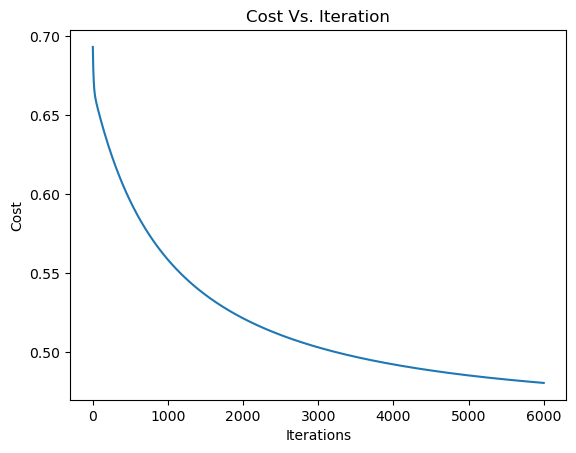

In [16]:
plt.plot(range(epochs), logisticRegression.cost_per_iteration)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Vs. Iteration")

In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)    
    return prec, rec

precision, recall = precision_recall(y_test, predictions)
print('Precision: %f Recall %f' % (precision, recall))

[[97 11]
 [23 21]]
Precision: 0.656250 Recall 0.477273


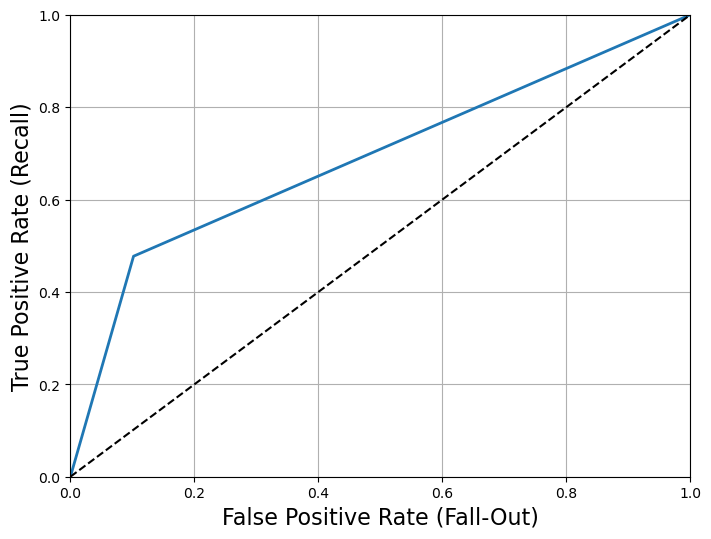

In [19]:
# roc curve 
from sklearn.metrics import roc_curve

fpr, tpr, thresholdsh = roc_curve(y_test, predictions)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predictions)

0.7373737373737373